In [328]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### 데이터 가져오기

In [329]:
diabetes = load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [330]:
df_X= diabetes.data
df_y = diabetes.target
print(df_X.shape)
print(df_y.shape)

(442, 10)
(442,)


In [331]:
data = load_diabetes(as_frame=True)

In [332]:
data['data']['target'] = data['target']
data['data']

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [333]:
data['data'].corrwith(data['data']['target'])

age       0.187889
sex       0.043062
bmi       0.586450
bp        0.441484
s1        0.212022
s2        0.174054
s3       -0.394789
s4        0.430453
s5        0.565883
s6        0.382483
target    1.000000
dtype: float64

In [334]:
#df_X = np.delete(df_X, 1,axis =1)

#### 모델에 입력할 데이터 X 준비하기

In [335]:
df_X = np.array(df_X)
df_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

#### 모델에 예측할 데이터 y 준비하기

In [336]:
df_y = np.array(df_y)
df_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

#### train 데이터와 test 데이터로 분리하기

In [337]:
train_input, test_input, train_target, test_target = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

#### 모델 준비하기

In [338]:
np.random.seed(42)
num_feature = train_input.shape[1]
W = np.random.rand(num_feature)
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(num_feature):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [339]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

In [340]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [341]:
loss(train_input, W, b, train_target)

29690.148096407873

In [342]:
def gradient(X, W, b, y):
    N = len(W)
    
    y_pred = model(X, W, b)
    
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    db = 2 * (y_pred - y).mean()
    return dW, db

In [343]:
LEARNING_RATE = 0.01

In [344]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(train_input, W, b, train_target)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(train_input, W, b, train_target)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 4688.9455
Iteration 200 : Loss 3674.4467
Iteration 300 : Loss 3388.8479
Iteration 400 : Loss 3233.7693
Iteration 500 : Loss 3135.8683
Iteration 600 : Loss 3069.6513
Iteration 700 : Loss 3023.3220
Iteration 800 : Loss 2990.3260
Iteration 900 : Loss 2966.5649
Iteration 1000 : Loss 2949.3086


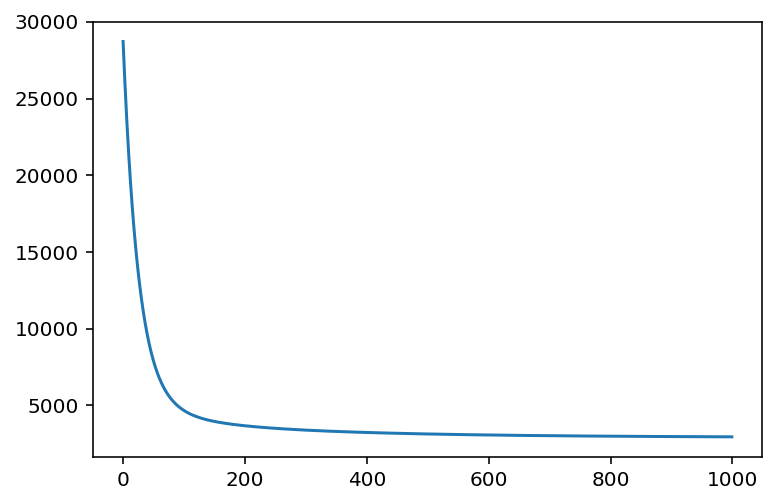

In [345]:
plt.plot(losses)
plt.show()

In [346]:
W, b

(array([  48.22812489, -170.02777021,  470.55540051,  306.64069582,
         -51.57093654, -100.13790088, -209.74077226,  145.38602918,
         350.83664371,  133.04487253]),
 151.49096064317663)

#### test 데이터에 대한 성능 확인하기

In [347]:
prediction = model(test_input, W, b)
mse = loss(test_input, W, b, test_target)
mse

2867.311487959944

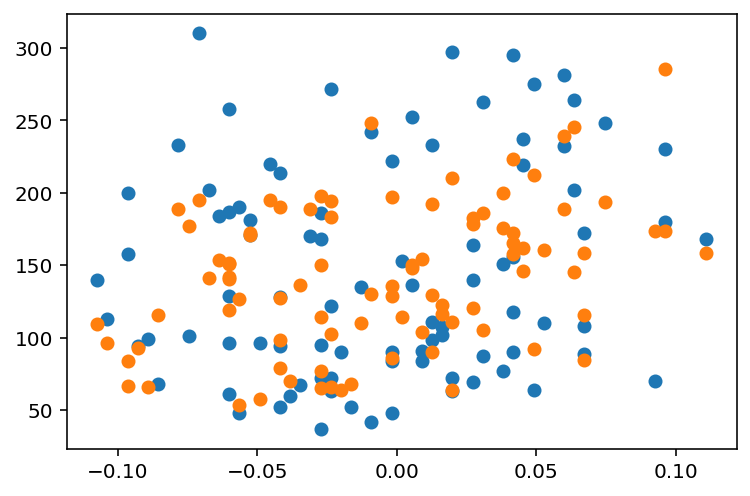

In [348]:
plt.scatter(test_input[:, 0], test_target)
plt.scatter(test_input[:, 0], prediction)
plt.show()

In [349]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#### 데이터 가져오기

In [350]:
bike_sharing = pd.read_csv("/aiffel/aiffel/bike_regression/data/train.csv")
bike_sharing

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


#### datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [351]:
bike_sharing.datetime = pd.to_datetime(bike_sharing.datetime)
bike_sharing['year'] = bike_sharing.datetime.dt.year
bike_sharing['month'] = bike_sharing.datetime.dt.month
bike_sharing['day'] = bike_sharing.datetime.dt.day
bike_sharing['hour'] = bike_sharing.datetime.dt.hour
bike_sharing['minute'] = bike_sharing.datetime.dt.minute
bike_sharing['second'] = bike_sharing.datetime.dt.second
'''월화수목금토일 가져오기
https://god9ma.tistory.com/27'''
bike_sharing['dayofweek']= bike_sharing["datetime"].dt.dayofweek

bike_sharing

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,2


#### year, month, day, hour, minute, second 데이터 개수 시각화하기

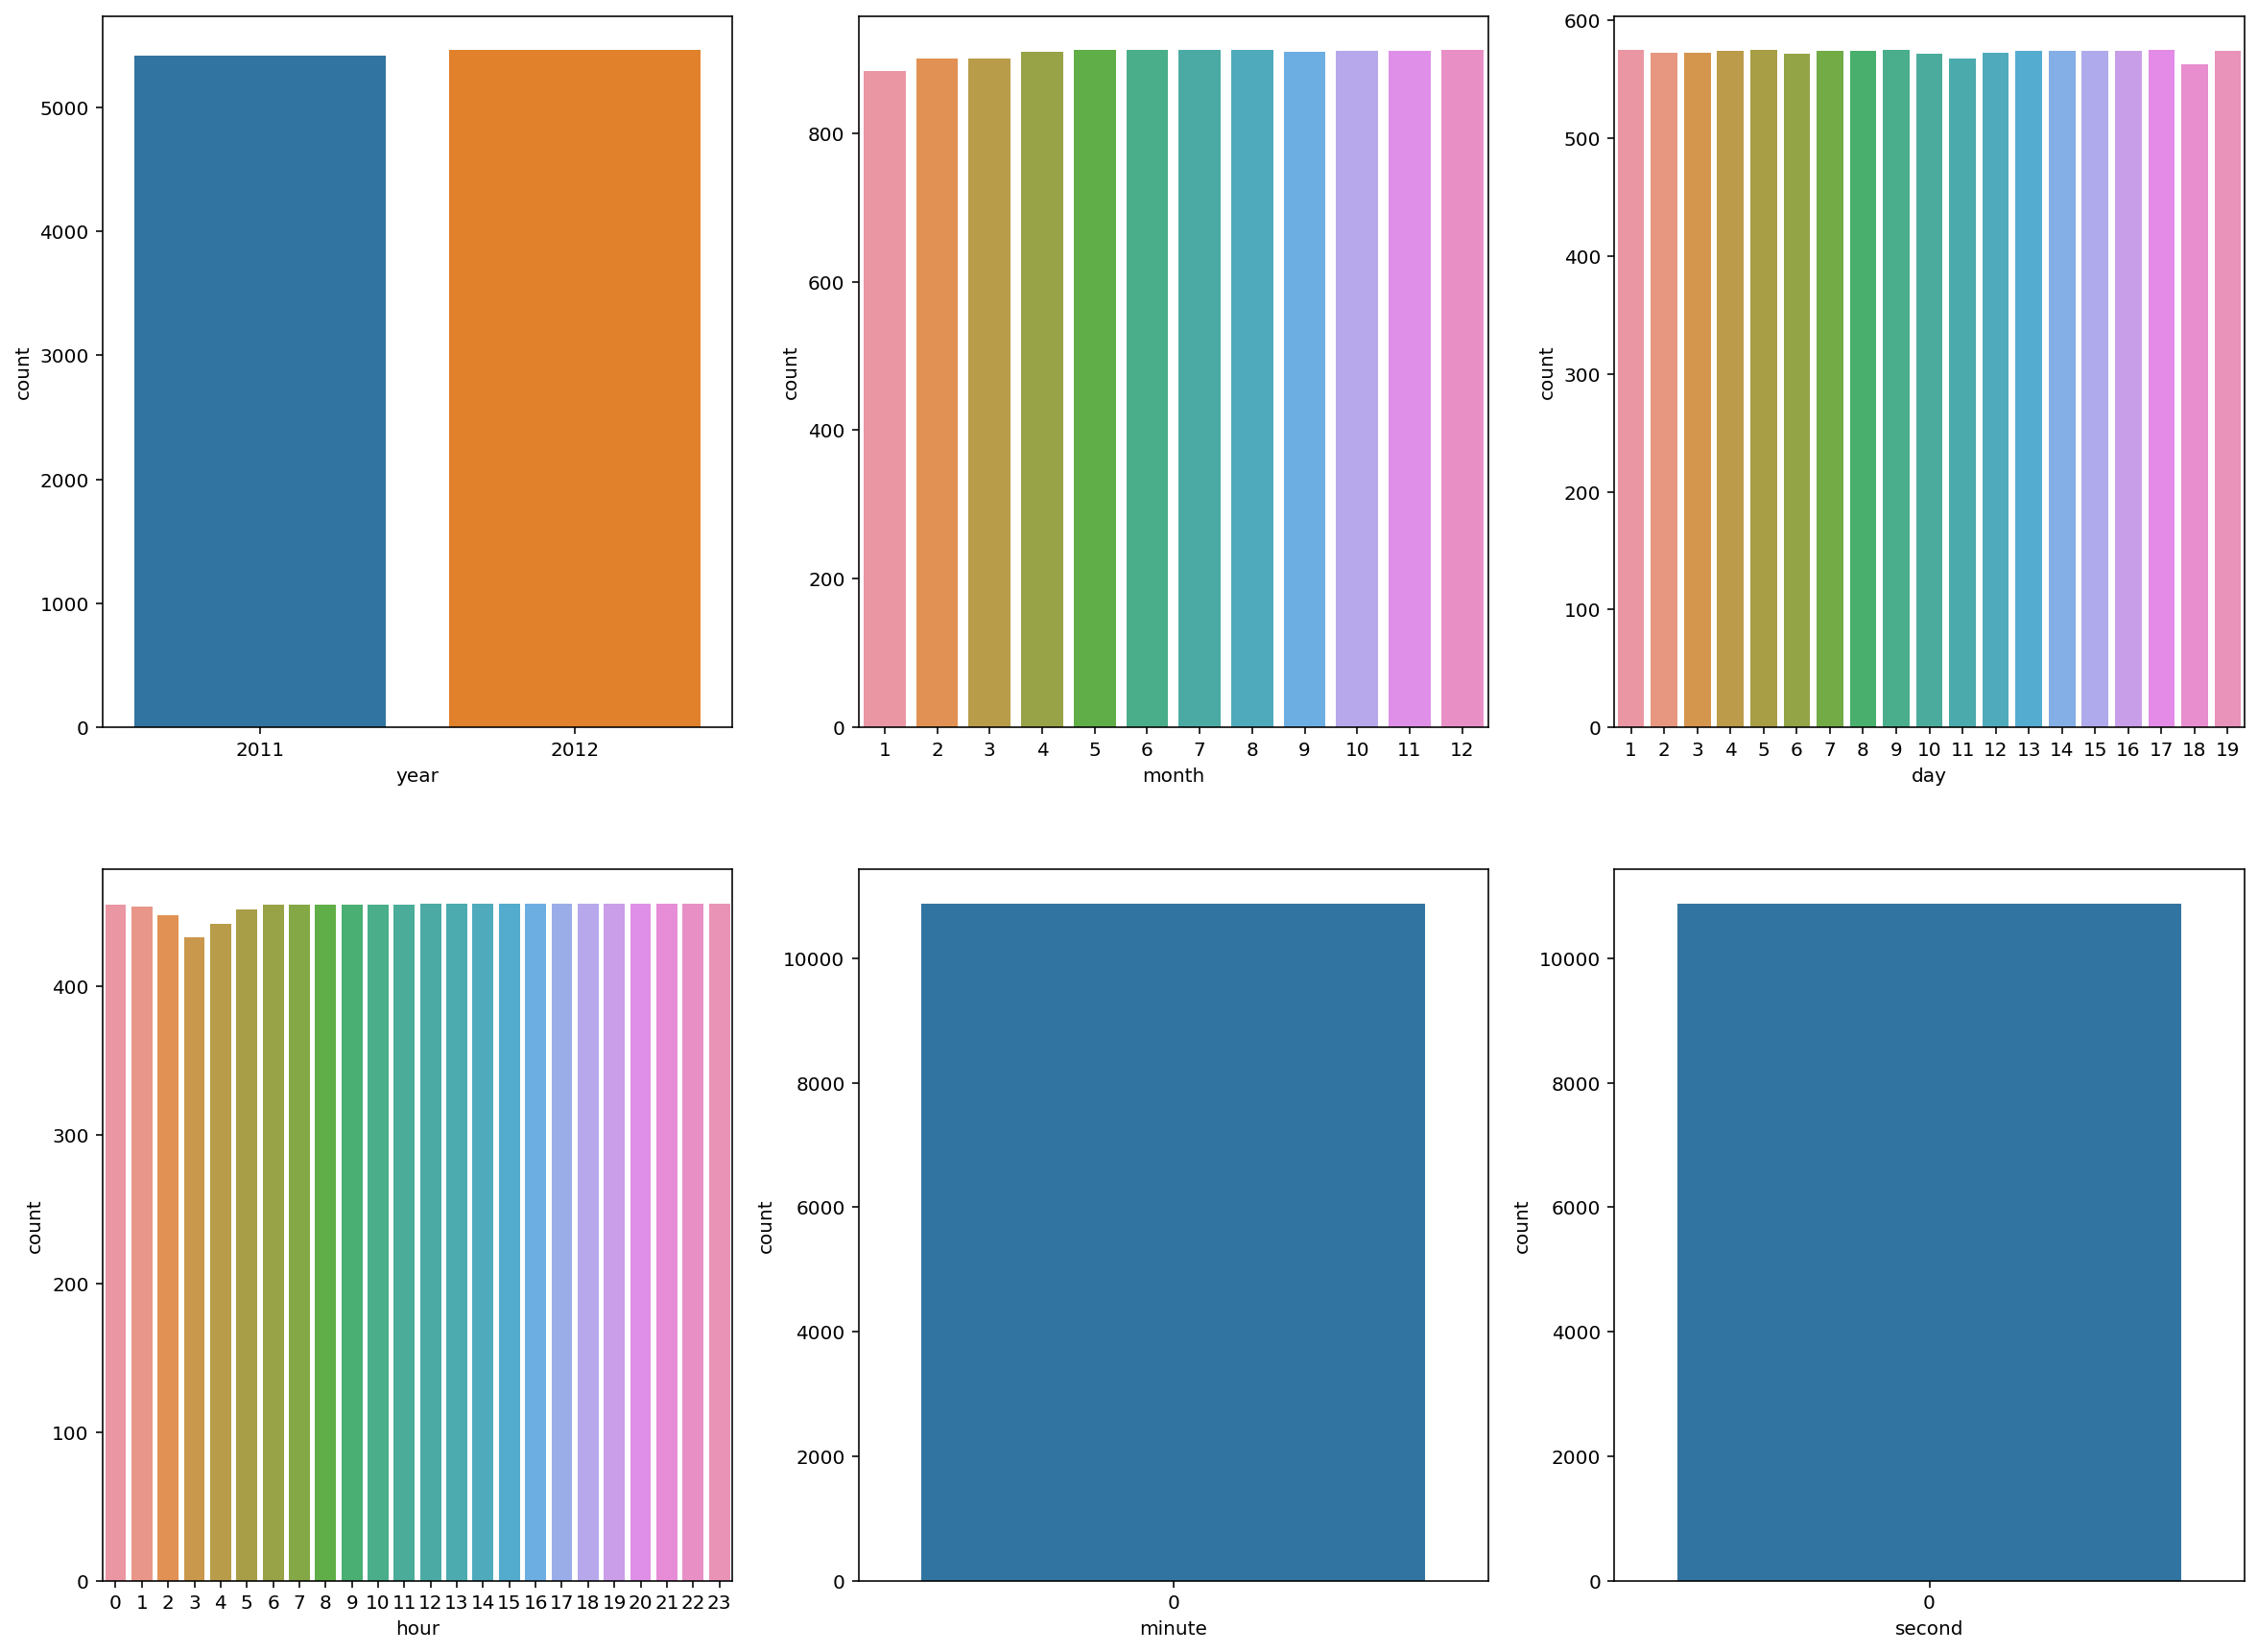

In [352]:
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(x = 'year', data = bike_sharing)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(x = 'month', data = bike_sharing)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(x = 'day', data = bike_sharing)

ax4 = fig.add_subplot(2,3,4)
sns.countplot(x = 'hour', data = bike_sharing)

ax5 = fig.add_subplot(2,3,5)
sns.countplot(x = 'minute', data = bike_sharing)

ax1 = fig.add_subplot(2,3,6)
sns.countplot(x = 'second', data = bike_sharing)

plt.show()

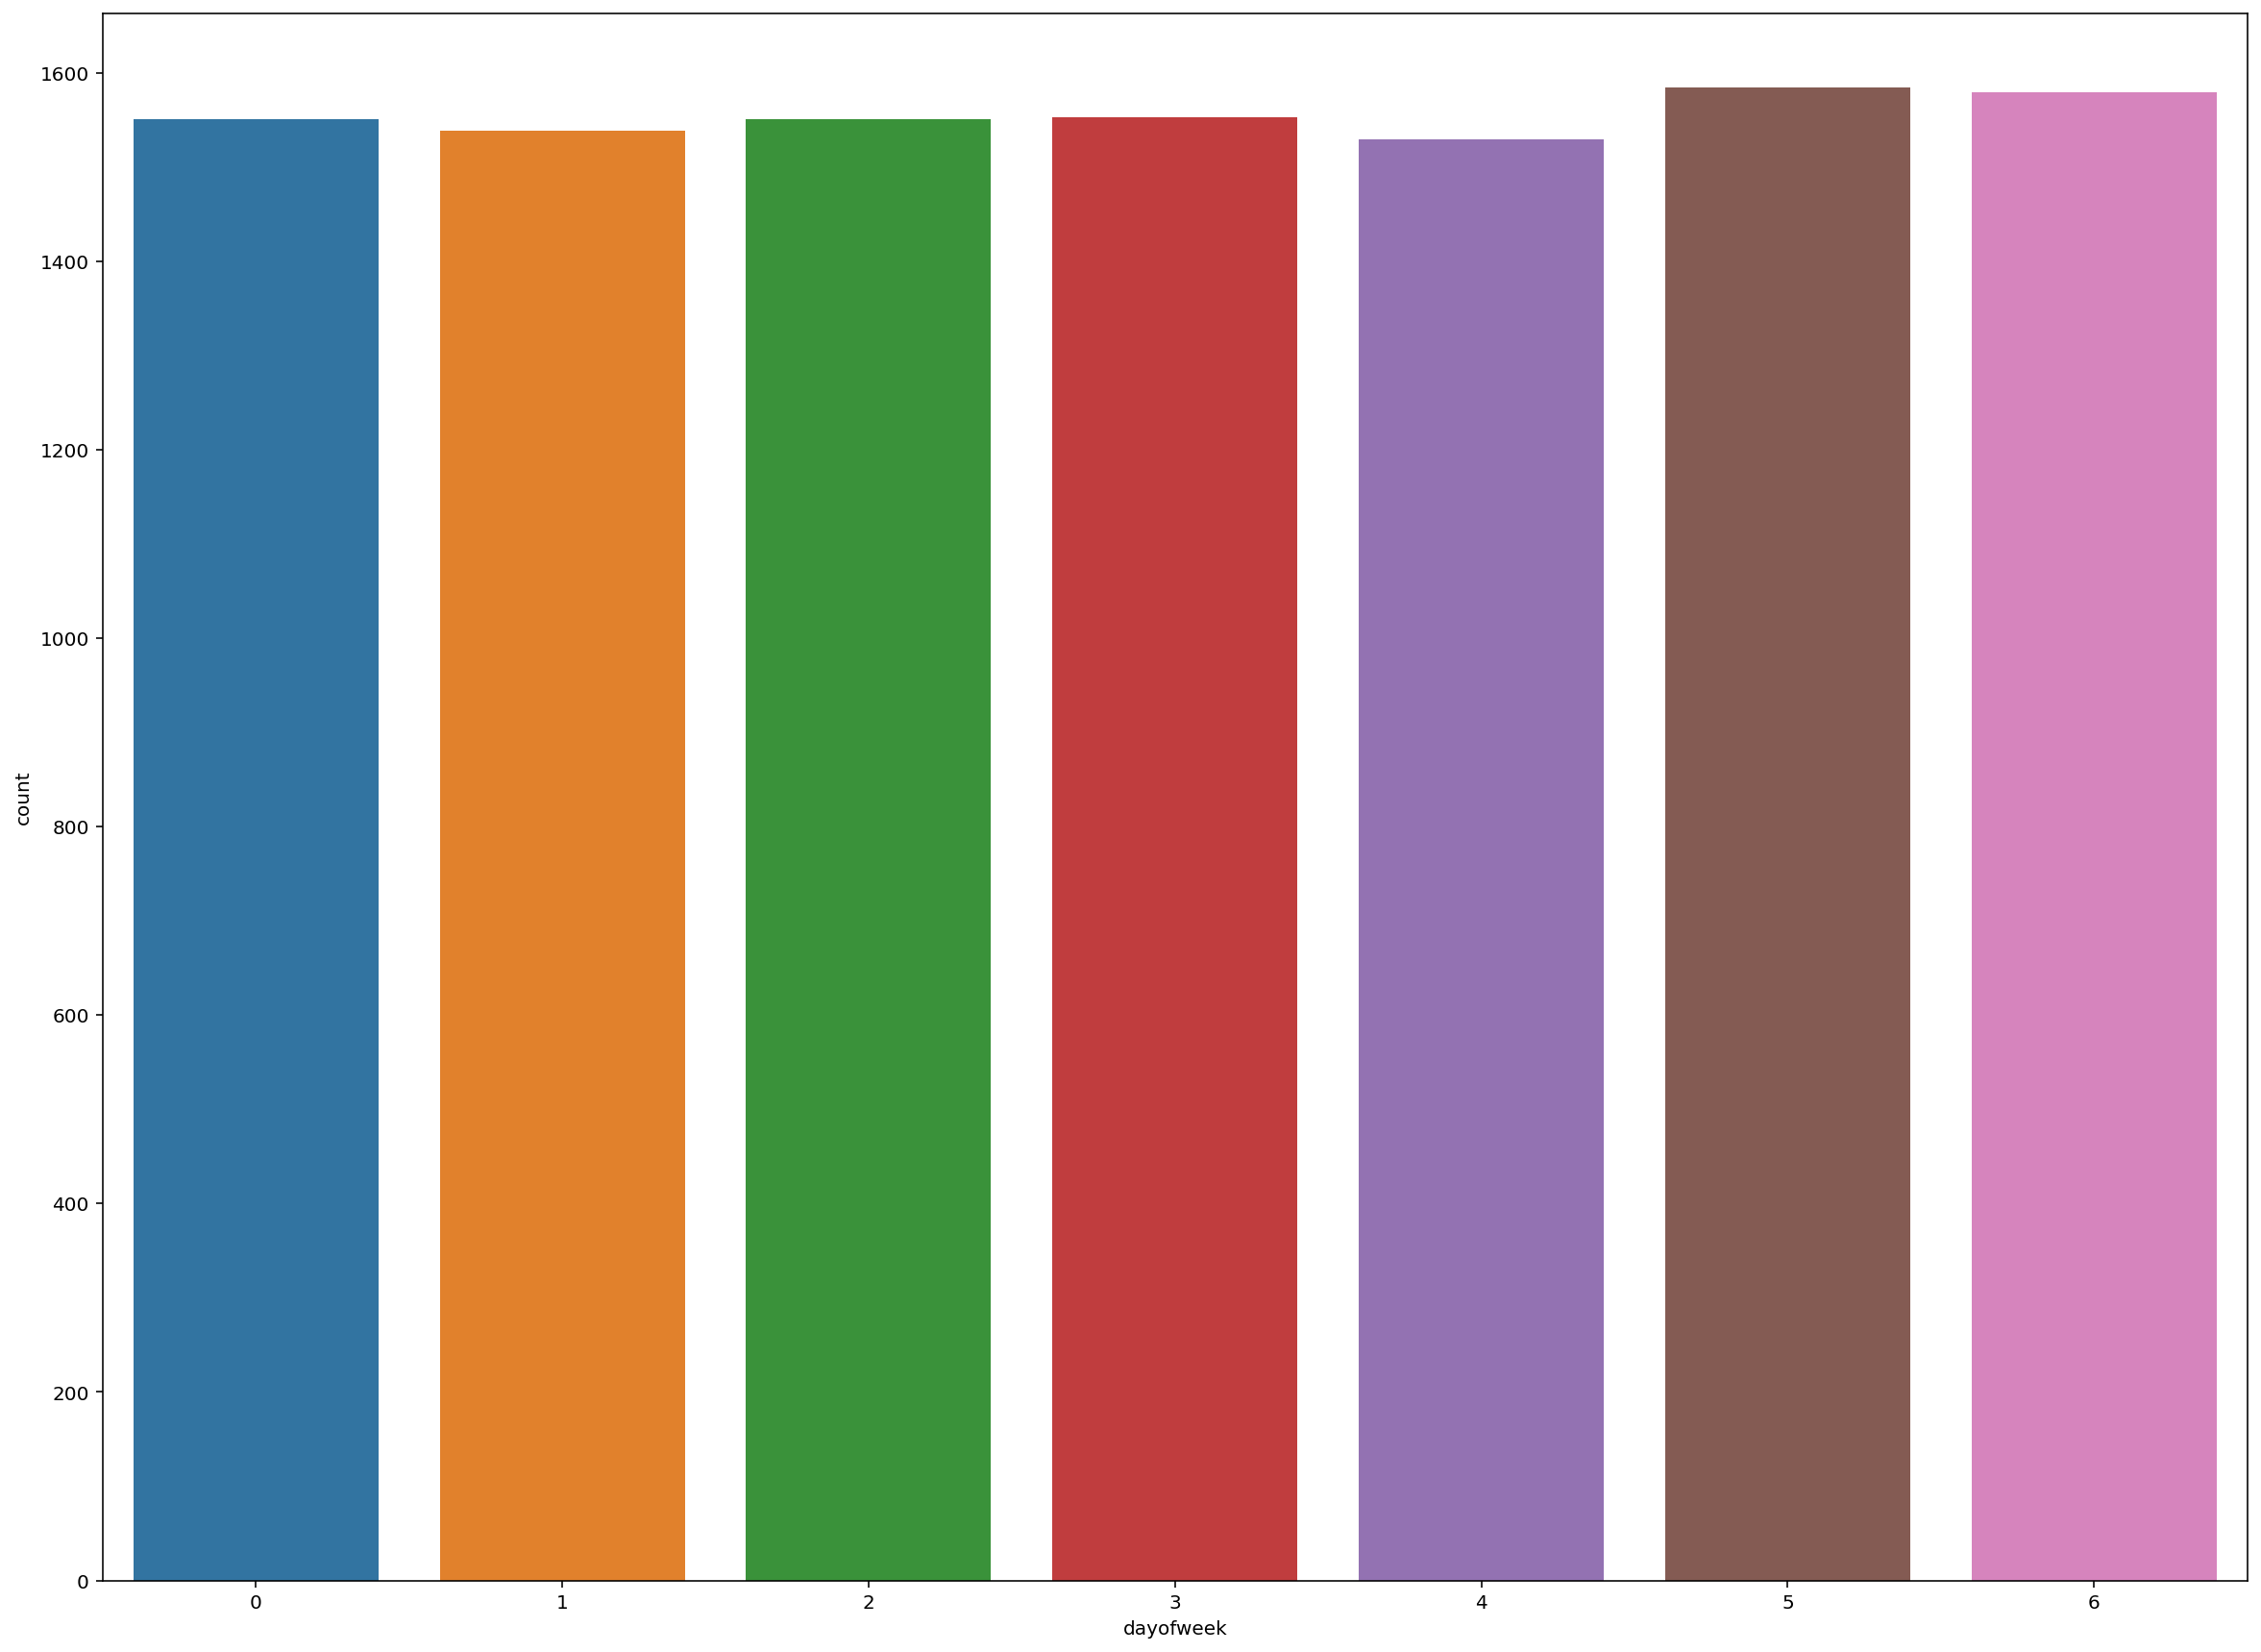

In [370]:
# 월화수목금토일 별로 데이터 크기 확인
fig = plt.figure(figsize=(20,15))
sns.countplot(x = 'dayofweek', data = bike_sharing)
plt.show()

#### X, y 컬럼 선택 및 train/test 데이터 분리

In [353]:
bike_sharing

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,2


In [354]:
bike_sharing.drop(columns=["datetime", "casual","registered"],inplace=True)
bike_sharing
# 출처 https://dsbook.tistory.com/328

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,minute,second,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0,0,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1,0,0,5
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2,0,0,5
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3,0,0,5
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19,0,0,2
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20,0,0,2
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21,0,0,2
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22,0,0,2


In [355]:
X = bike_sharing.drop(columns='count')
y = bike_sharing['count']
X.shape

(10886, 15)

In [356]:
y.shape

(10886,)

#### X, y 컬럼 선택 및 train/test 데이터 분리

In [357]:
train_input, test_input, train_target, test_target = train_test_split(X, y, random_state = 42)

#### LinearRegression 모델 학습

In [358]:
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

#### 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [359]:
pred = lr.predict(test_input)

In [360]:
mse = mean_squared_error(test_target, pred)
rmse = mean_squared_error(test_target, pred)**0.5

In [361]:
mse

20090.29853314087

In [362]:
rmse

141.74025022251396

#### x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

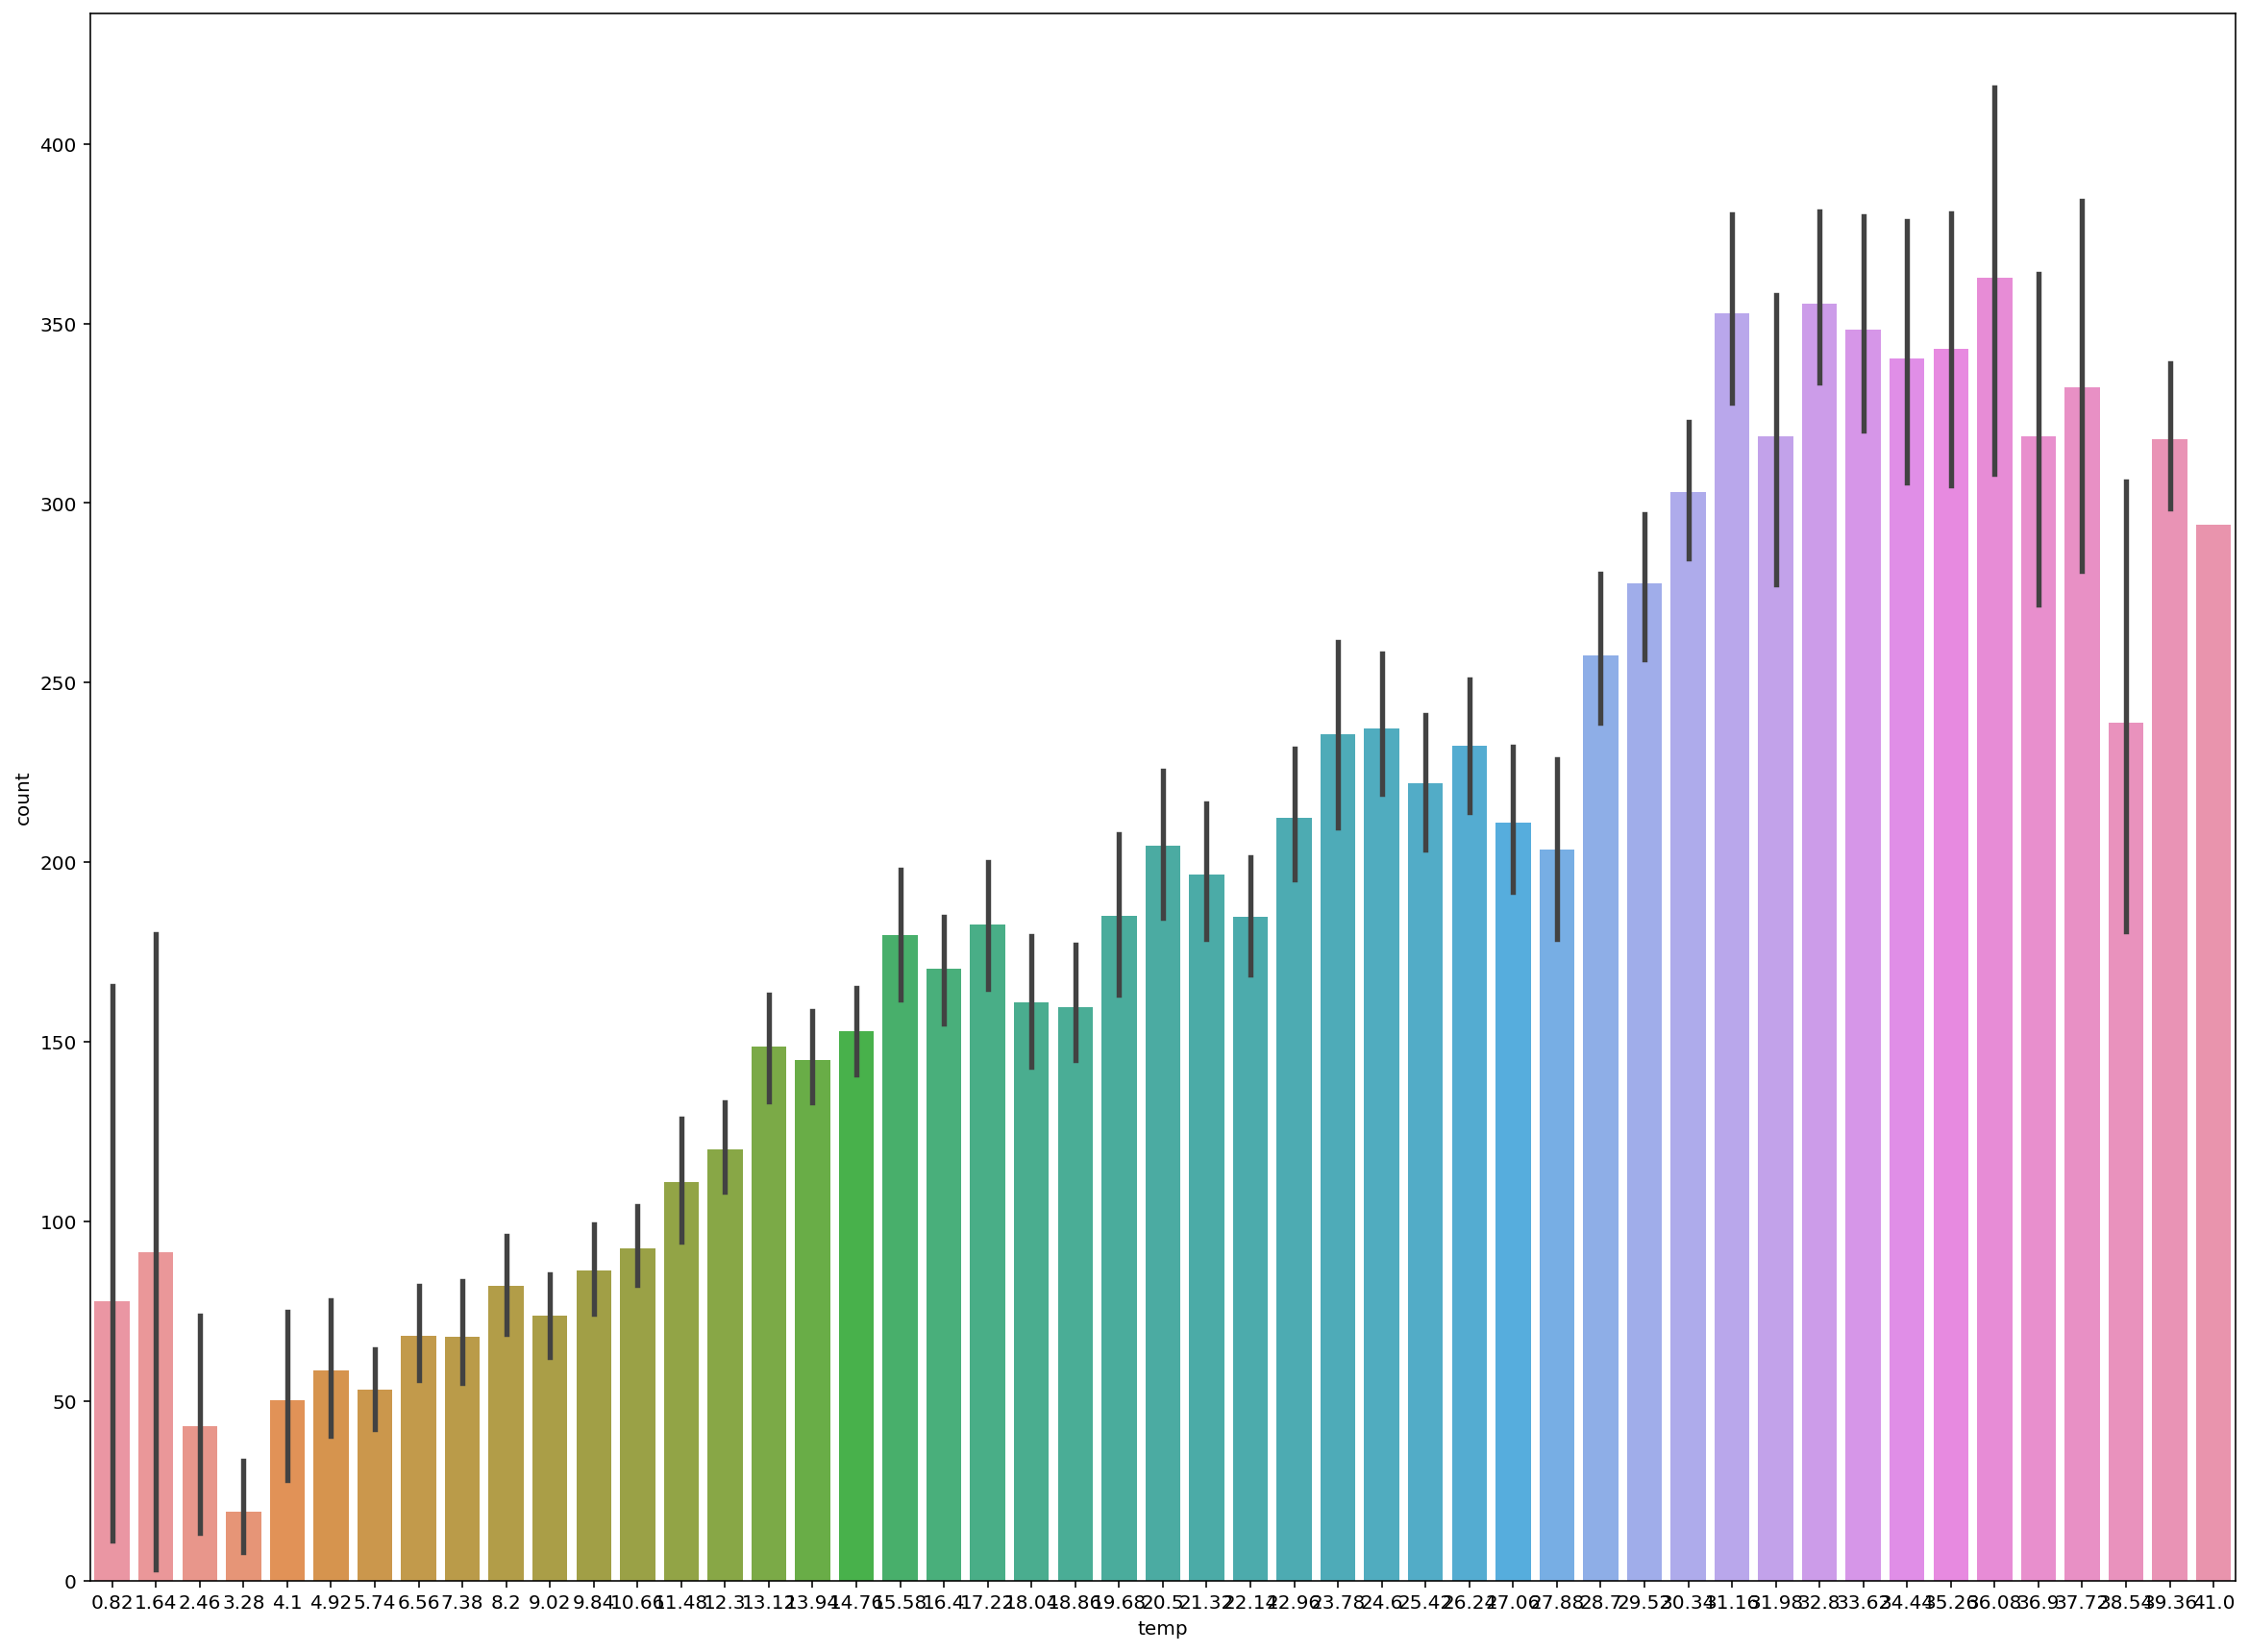

In [363]:
fig = plt.figure(figsize=(20,15))
sns.barplot( x = bike_sharing['temp'], y = bike_sharing['count'] )
plt.show()

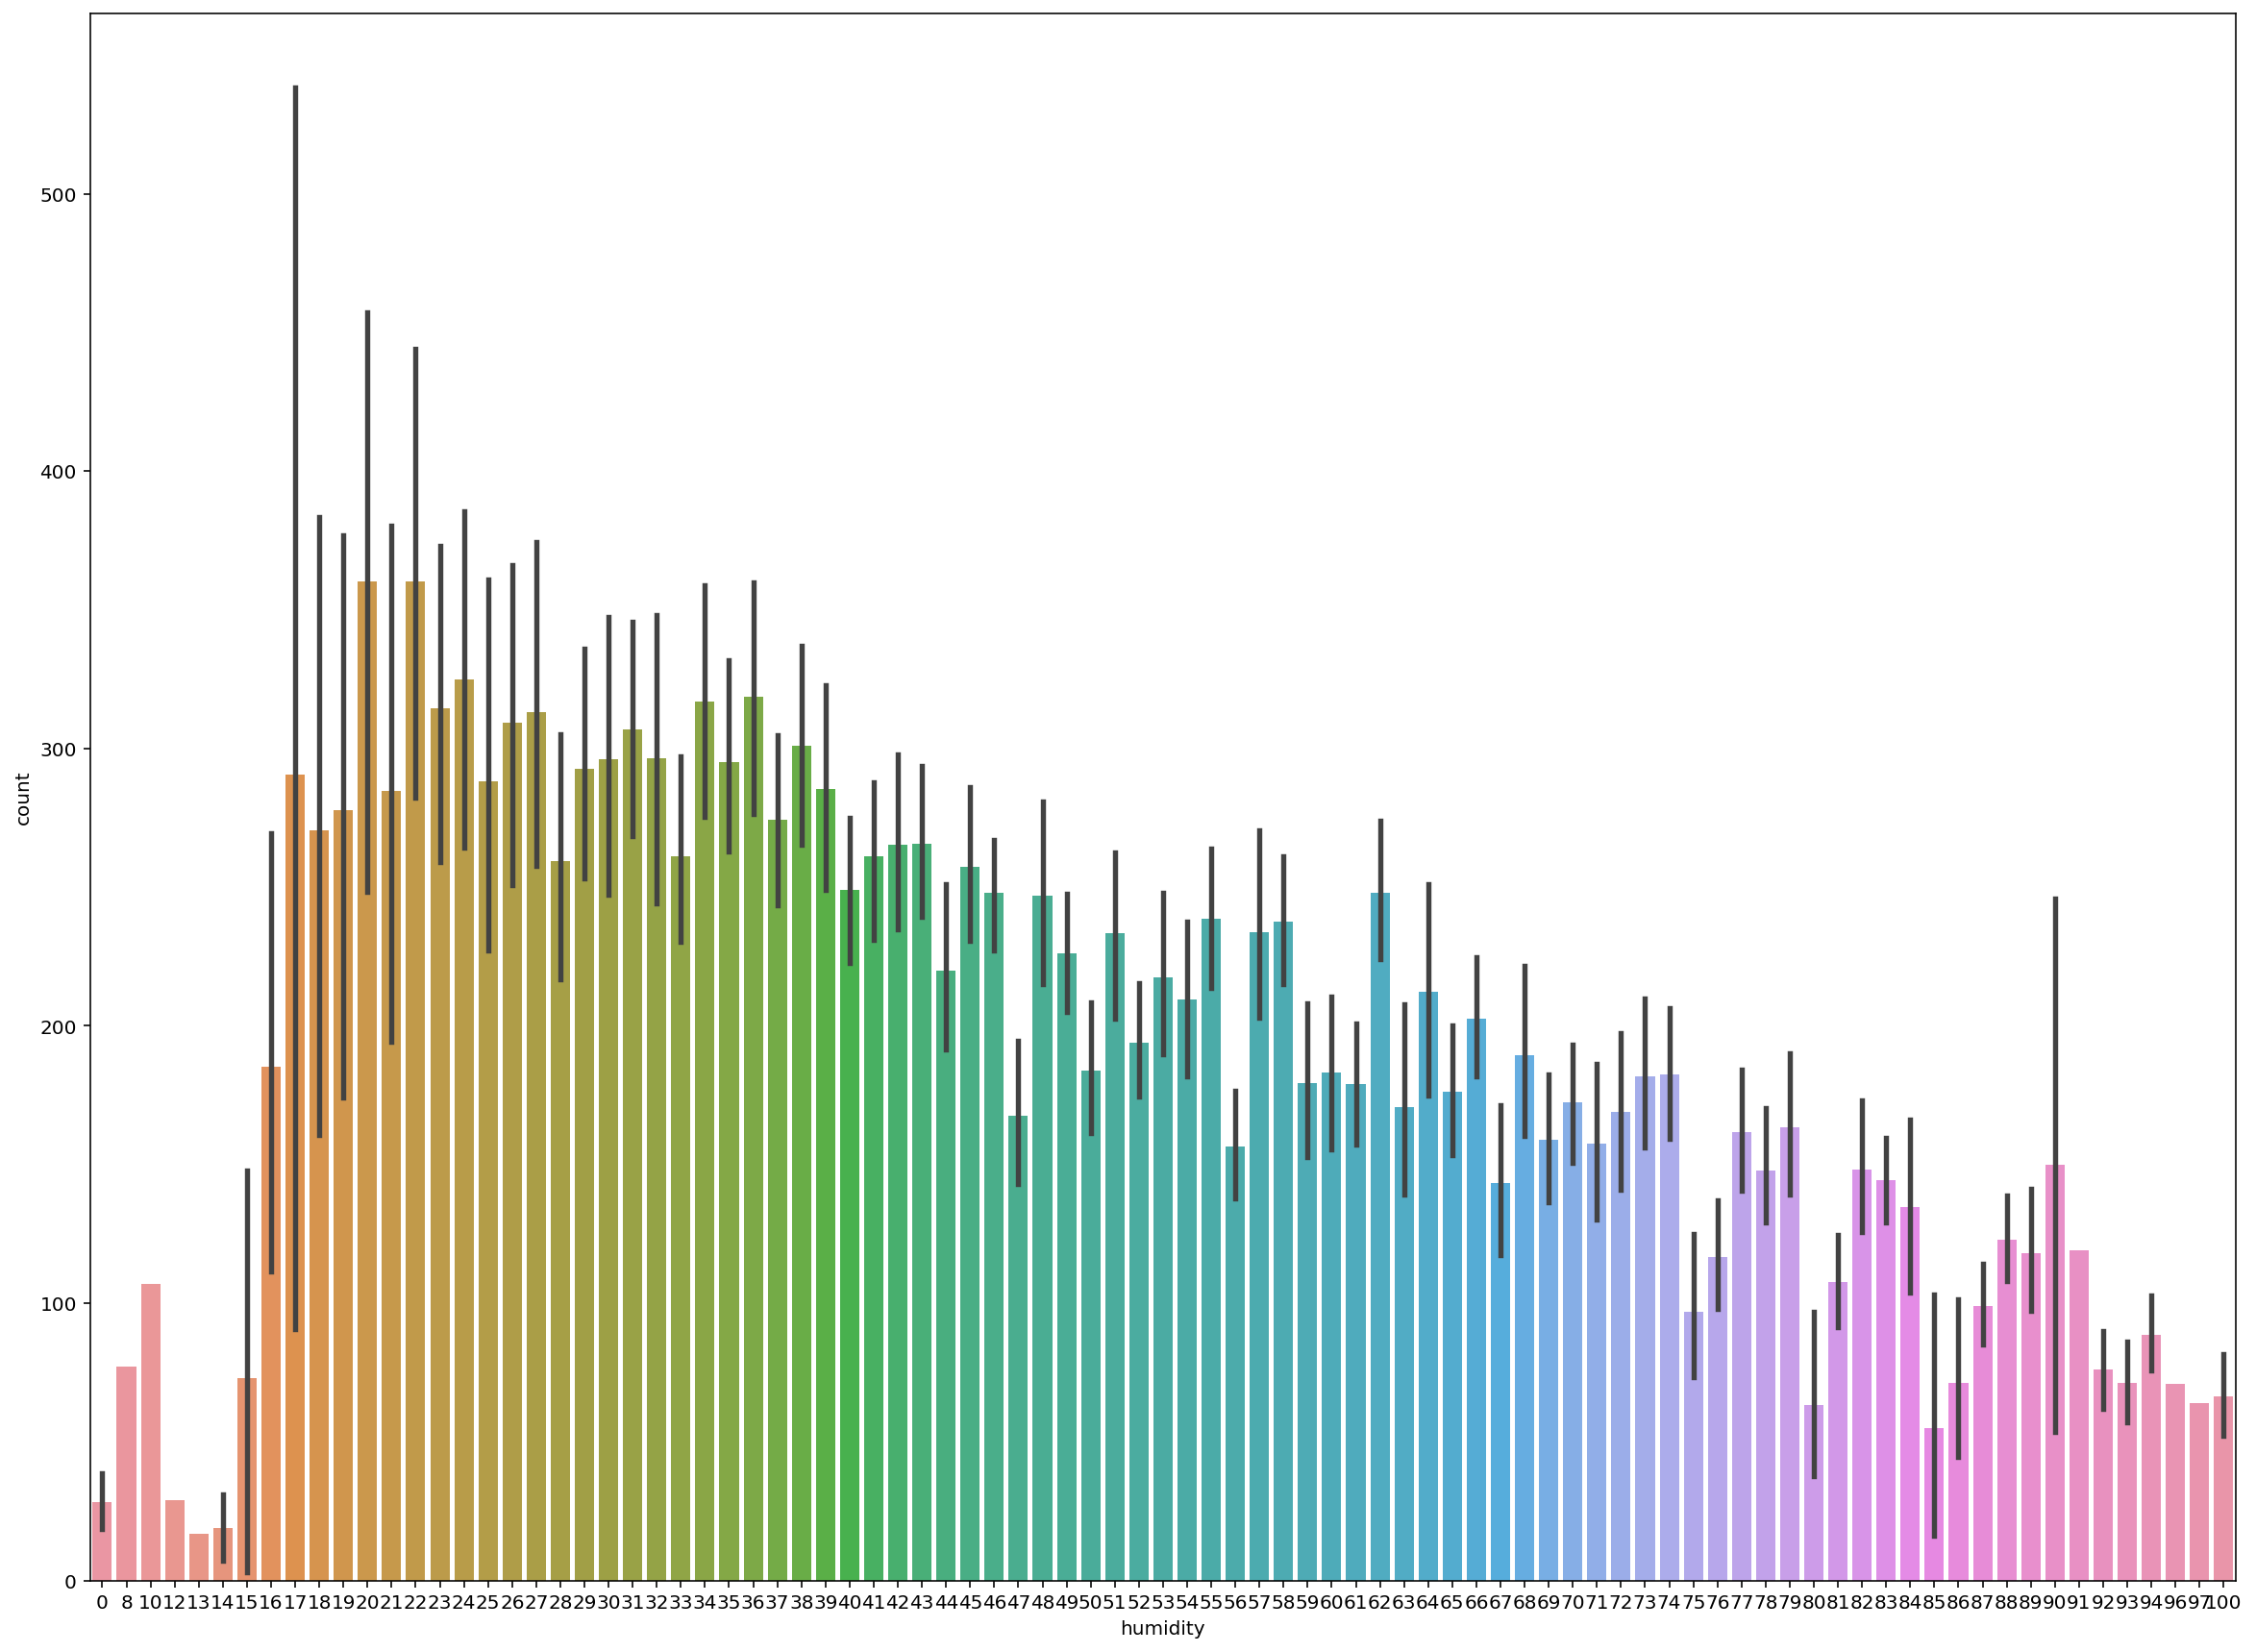

In [364]:
fig = plt.figure(figsize=(20,15))
sns.barplot( x = bike_sharing['humidity'], y = bike_sharing['count'] )
plt.show()

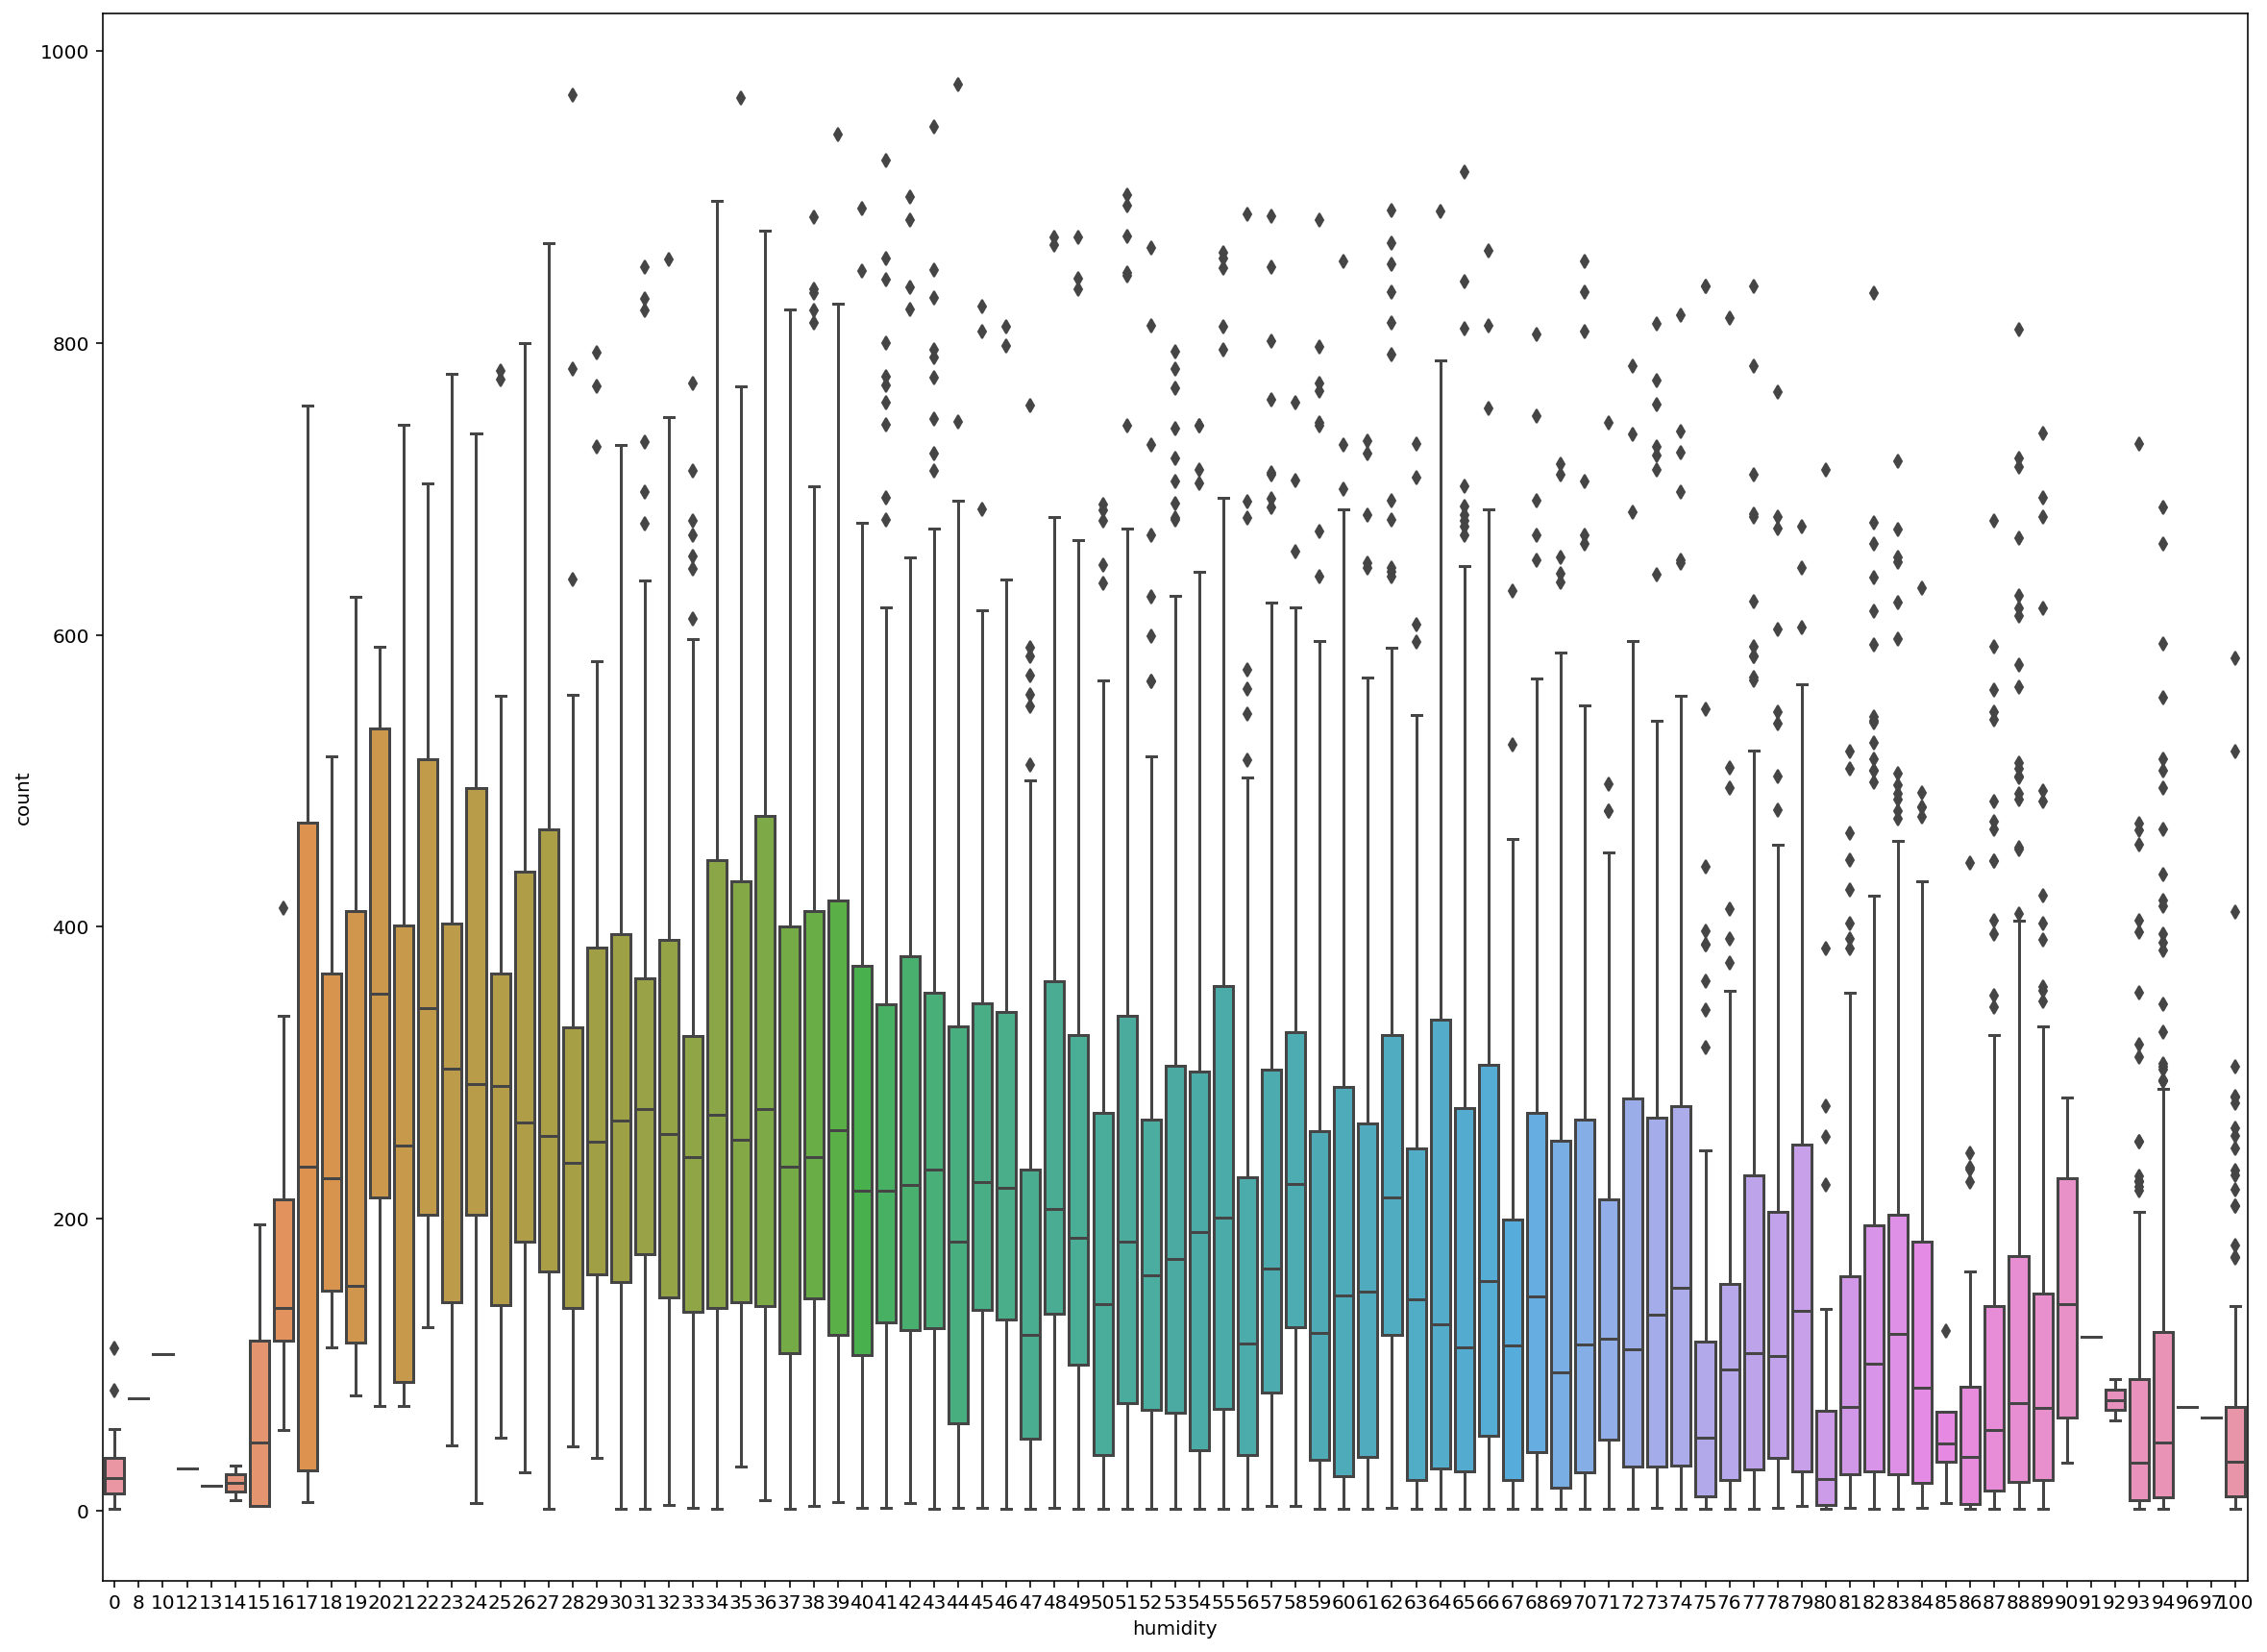

In [365]:
fig = plt.figure(figsize=(20,15))
sns.boxplot( x = bike_sharing['humidity'], y = bike_sharing['count'])
plt.show()

In [ ]:
good_day.corrwith(good_day['count'])

#### 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

In [366]:
bike_sharing

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,minute,second,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0,0,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1,0,0,5
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2,0,0,5
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3,0,0,5
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19,0,0,2
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20,0,0,2
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21,0,0,2
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22,0,0,2


In [374]:
good_day = bike_sharing[ (bike_sharing["weather"] == 1) & (bike_sharing["dayofweek"] == 0) & (bike_sharing["hour"] == 15) ]
good_day

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,minute,second,dayofweek
60,1,0,1,1,10.66,12.120,30,16.9979,72,2011,1,3,15,0,0,0
750,1,0,1,1,22.96,26.515,21,43.9989,90,2011,2,14,15,0,0,0
1034,1,0,1,1,13.94,15.150,31,26.0027,96,2011,3,7,15,0,0,0
1197,1,0,1,1,15.58,19.695,37,11.0014,101,2011,3,14,15,0,0,0
1410,2,0,1,1,31.16,33.335,23,36.9974,143,2011,4,4,15,0,0,0
1577,2,0,1,1,30.34,33.335,48,35.0008,141,2011,4,11,15,0,0,0
1817,2,0,1,1,27.06,31.060,61,12.9980,155,2011,5,2,15,0,0,0
1985,2,0,1,1,25.42,31.060,41,15.0013,199,2011,5,9,15,0,0,0
2153,2,0,1,1,29.52,33.335,51,0.0000,165,2011,5,16,15,0,0,0
2369,2,0,1,1,32.80,34.850,29,12.9980,165,2011,6,6,15,0,0,0


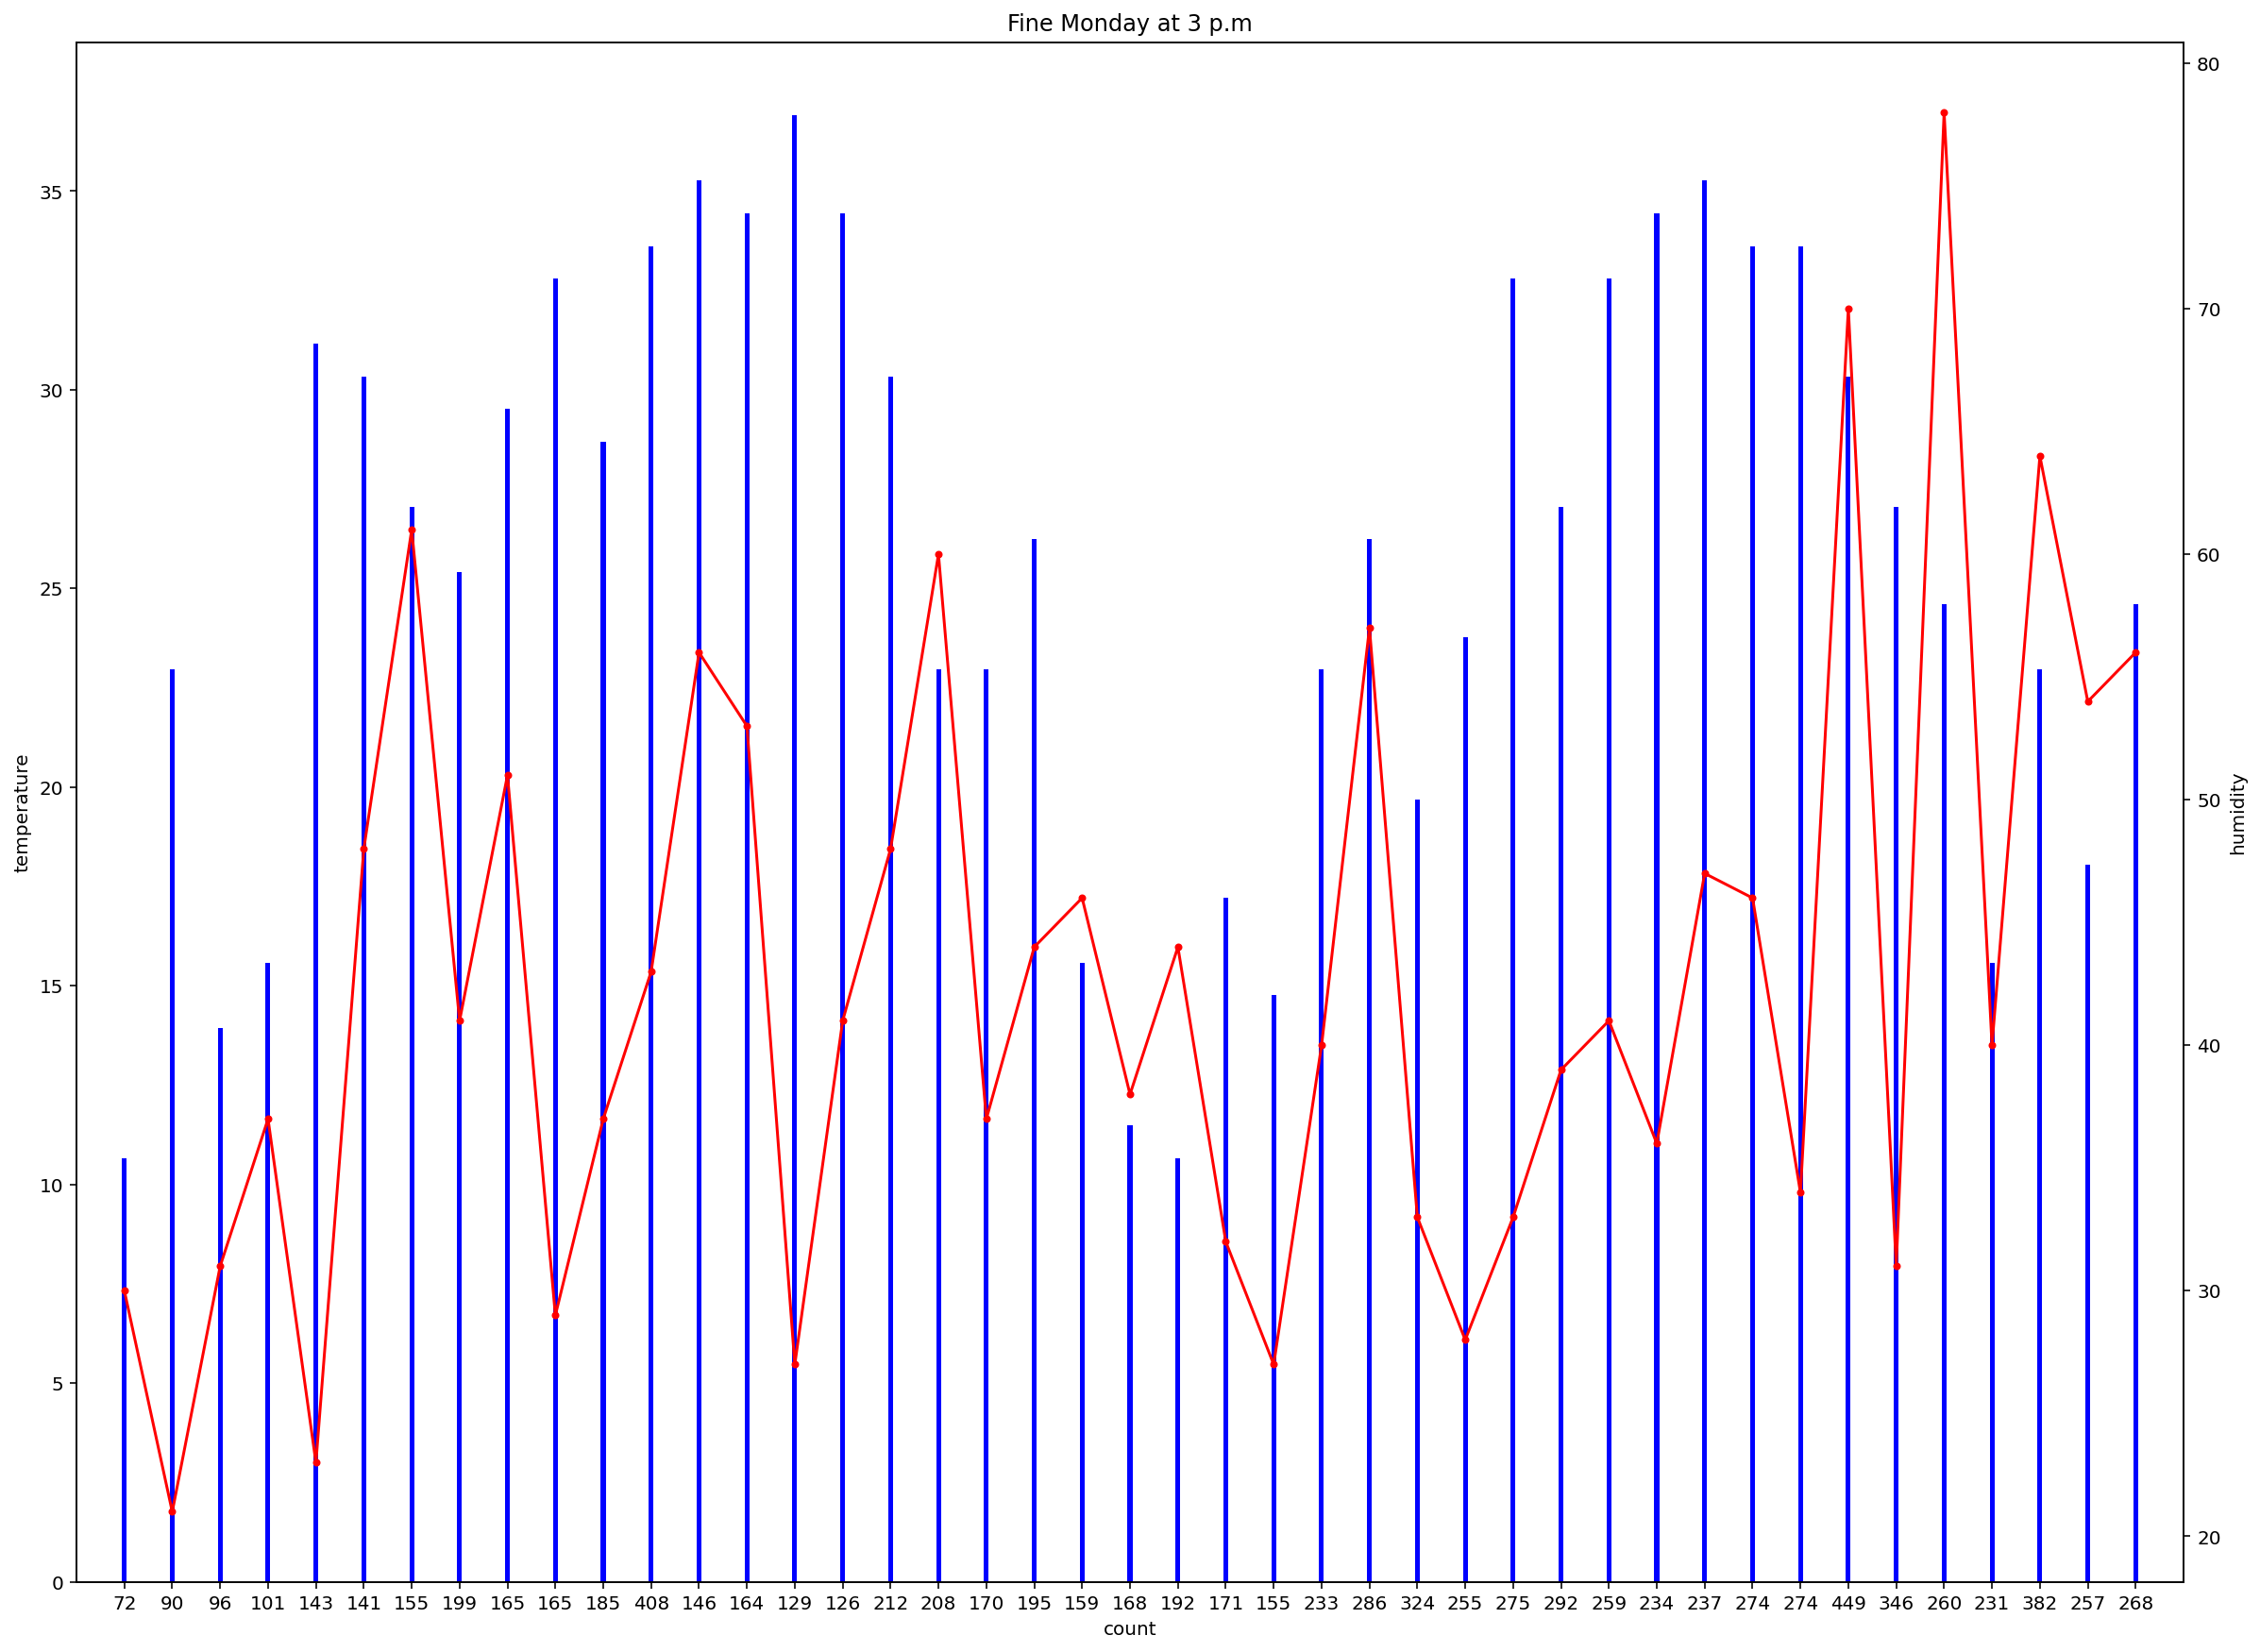

In [391]:
fig = plt.figure(figsize=(20,15))
y1_value = good_day['temp'] #(21.6, 23.6, 45.8, 77.0, 102.2, 133.3, 327.9, 348.0, 137.6, 49.3, 53.0, 24.9) 
x_name= good_day["count"] #('1', '2', '3', '4', '5','6', '7', '8', '9', '10', '11', '12') 
n_groups = len(x_name)

index = np.arange(n_groups)
bar_width = 0.1
#opacity = 0.1

plt.bar(index, y1_value, bar_width,
        align='center', tick_label=x_name,
         color='b', label='rainfall')

plt.xlabel('count')
plt.ylabel('temperature')
plt.title('Fine Monday at 3 p.m')
plt.xlim( -1, n_groups)
#plt.ylim( 0, 40)

# twin axis ....
plt.twinx()
y2_value = good_day["humidity"]#(1.6, 4.1, 10.2, 17.6, 22.8, 26.9, 28.8, 29.5, 25.6, 19.7, 11.5, 4.2)
plt.plot(index, y2_value, 'r.-')
plt.ylabel('humidity')
#plt.ylim( -40, 35)

plt.show()

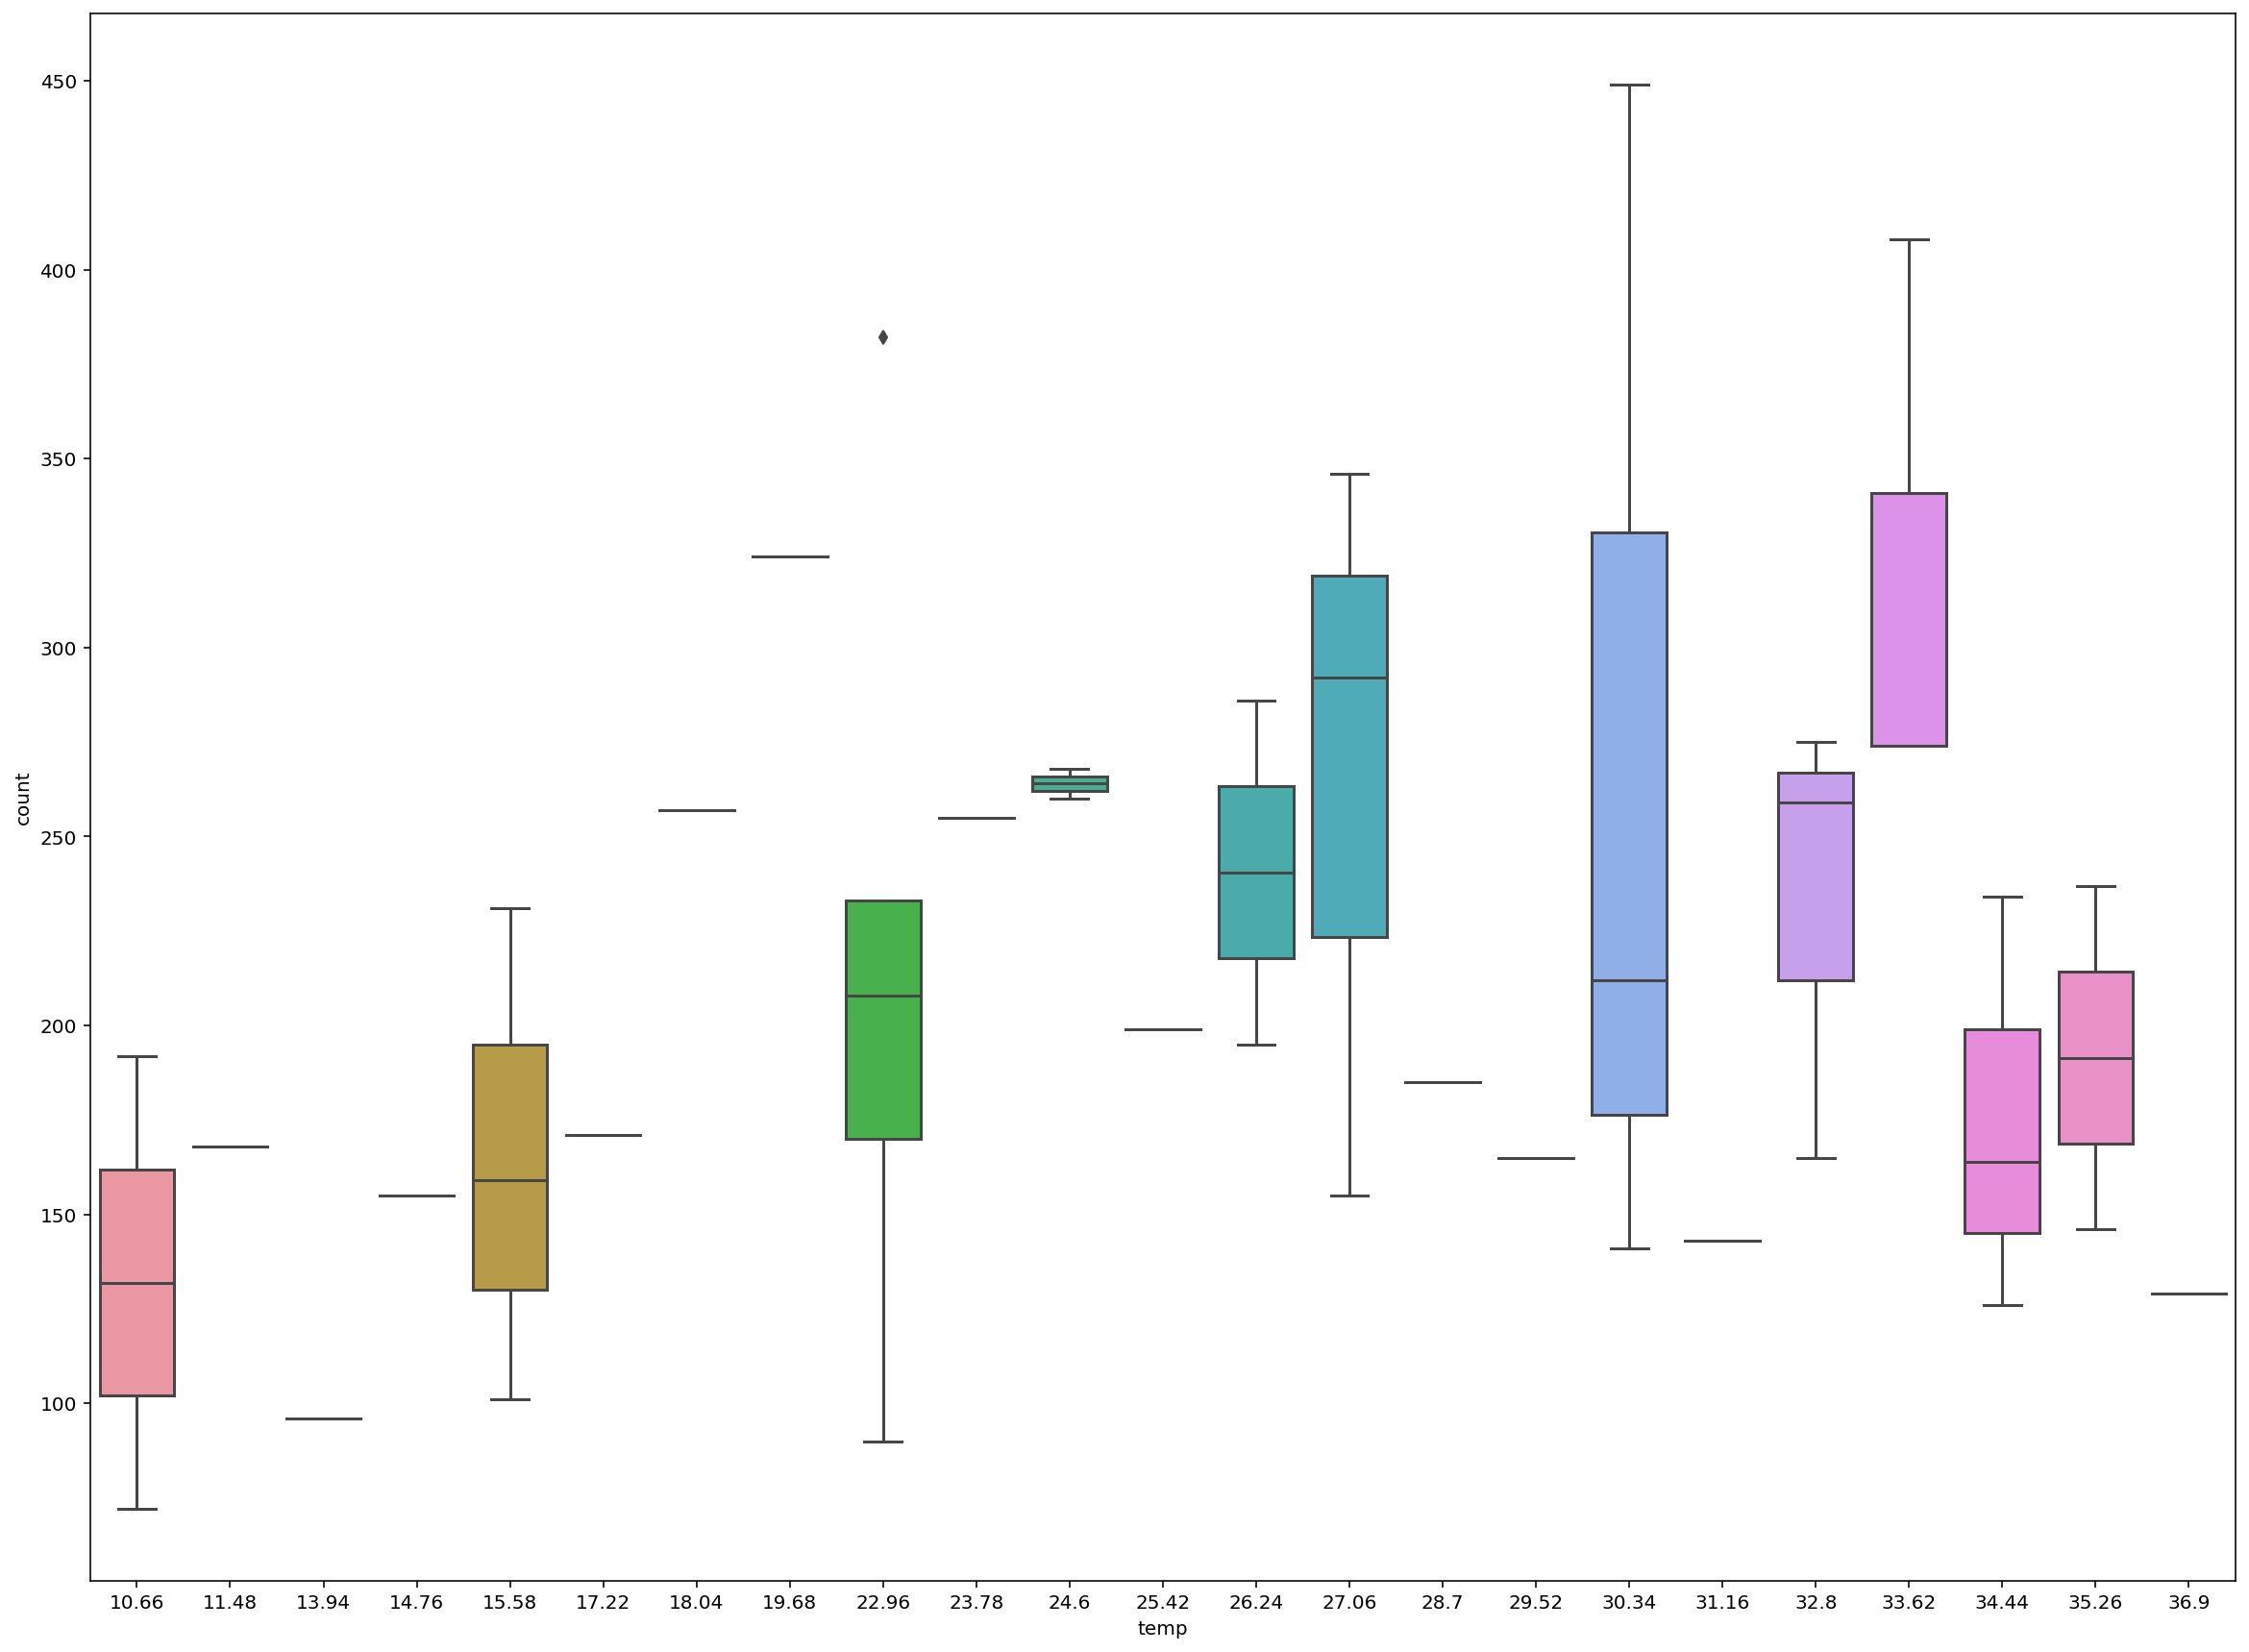

In [395]:
fig = plt.figure(figsize=(20,15))
sns.boxplot( x = good_day['temp'], y = good_day['count'] )
plt.show()

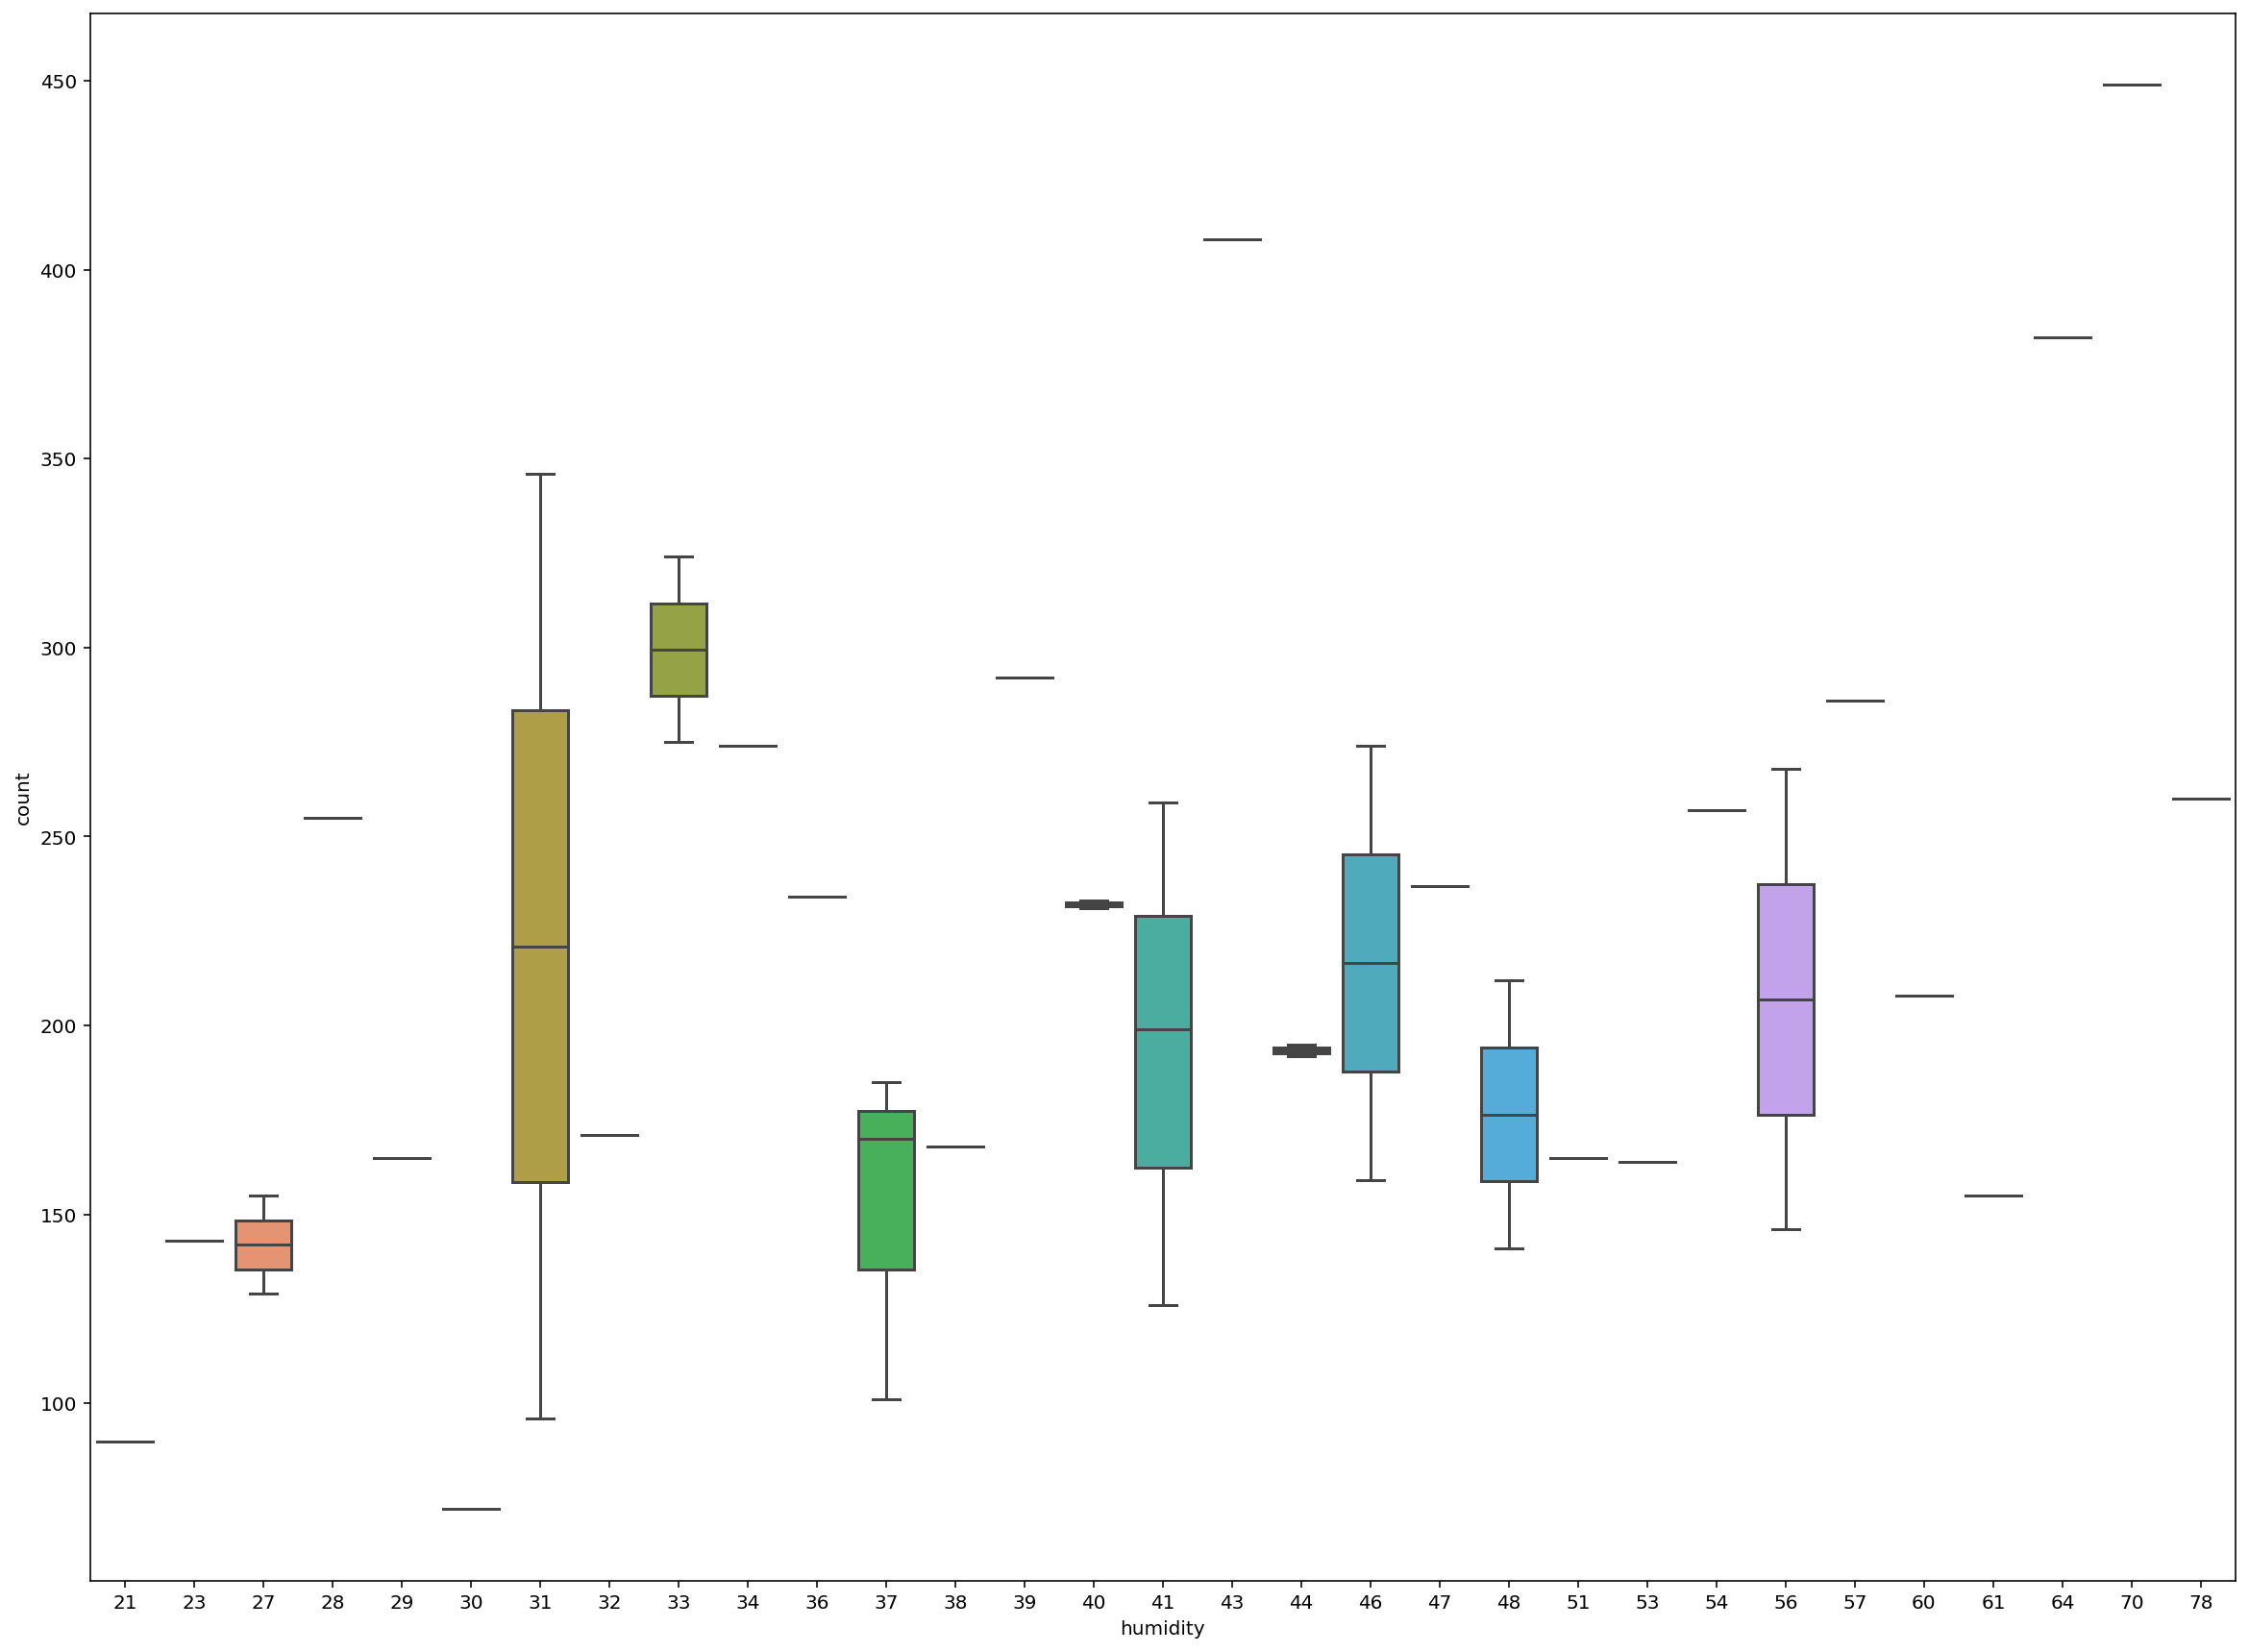

In [396]:
fig = plt.figure(figsize=(20,15))
sns.boxplot( x = good_day['humidity'], y = good_day['count'] )
plt.show()

In [397]:
good_day.corrwith(good_day['count'])

season        0.362886
holiday       0.466840
workingday   -0.466840
weather            NaN
temp          0.244704
atemp         0.266266
humidity      0.391506
windspeed    -0.137393
count         1.000000
year          0.604274
month         0.378352
day          -0.071155
hour               NaN
minute             NaN
second             NaN
dayofweek          NaN
dtype: float64

In [369]:
X = np.array([7, 8]) 

W = np.array([[1,3,5], 
              [2,4,6]])
X = np.array([[7, 8]]) 

W = np.array([[1,3,5], 
              [2,4,6]])

array([7, 8]) 
array([[7], [8]]) 

NameError: name 'array' is not defined

In [ ]:
import numpy as np

X = np.array([7, 8]) 

W = np.array([[1,3,5], 
              [2,4,6]])
print(np.dot(X,W))
print(np.matmul(X,W))

In [ ]:
X = np.array([[7, 8]]) 

W = np.array([[1,3,5], 
              [2,4,6]])

print(np.dot(X,W))
print(np.matmul(X,W))
np.dot(X,W).shape

In [ ]:
X = np.array([[7], [8]]) 

W = np.array([[1,3,5], 
              [2,4,6]])

print(np.dot(X,W))
print(np.matmul(X,W))
np.dot(X,W).shape

In [ ]:
a = np.array([7, 8]) 
a

In [ ]:
a.shape

In [ ]:
b = np.array([[7], [8]])
b

In [ ]:
b.shape

In [ ]:
c = np.array([[7, 8]])
c

In [ ]:
c.shape

In [ ]:
x = np.array([[0.1, 0.8, 0.1], 
              [0.3, 0.1, 0.6],
             [0.2, 0.5, 0.3], 
              [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=0) 

In [ ]:
y

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))